# El problema de las $n$-reinas y métodos de optimización

![GIF Queen](https://media.giphy.com/media/eWTy1lD67R8Yg/giphy.gif)
![GIF Queen of England](https://media.giphy.com/media/dhgg2GTU8pv8vmkdiW/giphy.gif)

In [1]:
from random import randint, choice, shuffle, random

In [2]:
from itertools import count

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

## Un problema de optimización

In [5]:
class OptimizationProblem(object):
    def initial_state(self):
        pass
    
    def random_state(self):
        pass
    
    def objective_value(self, state):
        pass
    
    def actions(self, state):
        pass
    
    def random_action(self, state):
        actions = tuple(self.actions(state))
        return None if not actions else choice(actions)
    
    def apply_action(self, state, action):
        pass
    
    def neighborhood(self, state):
        for action in self.actions(state):
            yield self.apply_action(state, action)
            
    def random_neighbor(self, state):
        action = self.random_action(state)
        if not action:
            return None
        return self.apply_action(state, action)

## Modelando el problema de las $n$-reinas

In [6]:
class NQueens(OptimizationProblem):
    def __init__(self, n):
        self.n = n
        
    def initial_state(self):
        n = self.n
        return tuple(0 for _ in range(n))
    
    def random_state(self):
        n = self.n
        return tuple(randint(0, n - 1) for _ in range(n))
    
    def objective_value(self, board):
        n = self.n
        max_attacks = (n * (n - 1)) / 2
        attacks = count_attacks(board)
        return max_attacks - attacks
    
    def actions(self, board):
        n = self.n
        for col in range(n):
            for row in range(n):
                if row == board[col]:
                    continue
                yield (col, row)
    
    def random_action(self, board):
        n = self.n
        col = randint(0, n - 1)
        row = randint(0, n - 2)
        return (col, row if row < board[col] else row + 1)
    
    def apply_action(self, board, move):
        n = self.n
        return tuple(move[1] if col == move[0] else board[col]
                for col in range(n))

In [7]:
def queen_pairs(board):
    n = len(board)
    for col1 in range(n - 1):
        for col2 in range(col1 + 1, n):
            yield (col1, board[col1]), (col2, board[col2])

In [8]:
def count_attacks(board):
    n = len(board)
    return sum((row1 == row2) or (abs(row2 - row1) == (col2 - col1))
               for (col1, row1), (col2, row2) in queen_pairs(board))

In [9]:
def show(board):
    n = len(board)
    squares = [[False] * n for _ in range(n)]
    for col in range(n):
        row = board[col]
        squares[row][col] = True
    display = "┏" + "━━━┳" * (n - 1) + "━━━┓\n"
    for row in range(n):
        for queen in squares[row]:
            symbol = "♛" if queen else " "
            display += f"┃ {symbol} "
        display += "┃\n"
        if row == n - 1:
            continue
        display += "┣" + "━━━╋" * (n - 1) + "━━━┫\n"
    display += "┗" + "━━━┻" * (n - 1) + "━━━┛\n"
    print(display)

In [10]:
q8 = NQueens(8)

## Acenso de colinas (*Hill climbing*)

![GIF sisifo](https://media.giphy.com/media/xT0BKumCMrUb0dCypa/giphy.gif)

In [11]:
def hill_climbing(problem, log = lambda *_: None):
    value = problem.objective_value
    current = problem.random_state()
    current_val = value(current)
    log(current, current_val)
    while True:
        neighbor = hill_successor(problem, current)
        if not neighbor:
            break
        neighbor_val = value(neighbor)
        if neighbor_val <= current_val:
            break
        current = neighbor
        current_val = neighbor_val
        log(current, current_val)
    return current

In [12]:
def hill_successor(problem, board):
    neighbors = list(problem.neighborhood(board))
    if not neighbors:
        return None
    shuffle(neighbors)
    return max(neighbors, key=problem.objective_value)

### Resolviendo el problema (a veces)

In [13]:
hill_climbing(q8)

(2, 5, 1, 4, 7, 0, 3, 5)

In [14]:
hill_climbing(q8, lambda board, val: print(board, val));

(6, 3, 2, 7, 3, 3, 2, 5) 21.0
(6, 3, 2, 7, 3, 0, 2, 5) 25.0
(6, 3, 1, 7, 3, 0, 2, 5) 26.0
(6, 3, 1, 7, 5, 0, 2, 5) 27.0
(6, 3, 1, 7, 5, 0, 2, 4) 28.0


In [15]:
def debug_log(board, val):
    print(val)
    show(board)
    return

In [16]:
hill_climbing(q8, debug_log)

21.0
┏━━━┳━━━┳━━━┳━━━┳━━━┳━━━┳━━━┳━━━┓
┃   ┃   ┃   ┃   ┃   ┃   ┃   ┃   ┃
┣━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━┫
┃   ┃   ┃   ┃   ┃ ♛ ┃   ┃   ┃   ┃
┣━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━┫
┃ ♛ ┃   ┃   ┃   ┃   ┃   ┃   ┃   ┃
┣━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━┫
┃   ┃   ┃   ┃   ┃   ┃   ┃   ┃   ┃
┣━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━┫
┃   ┃ ♛ ┃   ┃   ┃   ┃   ┃ ♛ ┃   ┃
┣━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━┫
┃   ┃   ┃   ┃   ┃   ┃   ┃   ┃   ┃
┣━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━┫
┃   ┃   ┃ ♛ ┃ ♛ ┃   ┃   ┃   ┃ ♛ ┃
┣━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━┫
┃   ┃   ┃   ┃   ┃   ┃ ♛ ┃   ┃   ┃
┗━━━┻━━━┻━━━┻━━━┻━━━┻━━━┻━━━┻━━━┛

24.0
┏━━━┳━━━┳━━━┳━━━┳━━━┳━━━┳━━━┳━━━┓
┃   ┃   ┃   ┃   ┃   ┃   ┃   ┃   ┃
┣━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━┫
┃   ┃   ┃   ┃   ┃ ♛ ┃   ┃   ┃   ┃
┣━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━┫
┃ ♛ ┃   ┃   ┃   ┃   ┃   ┃   ┃   ┃
┣━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━┫
┃   ┃   ┃   ┃ ♛ ┃   ┃   ┃   ┃   ┃
┣━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━┫
┃   ┃ ♛ ┃   ┃   ┃   ┃   ┃ ♛ ┃   ┃
┣━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━┫
┃   ┃   ┃   ┃   ┃   ┃   ┃   ┃   ┃
┣━━

(2, 4, 6, 3, 5, 7, 4, 0)

### Trayectorias de función objetivo

In [17]:
def objective_plot(vals):
    fig = plt.figure()
    ax = plt.axes()
    
    iters = list(range(len(vals)))
    
    ax.set_ylim([0, 8*7/2 + 1])
    ax.set_xlabel("tiempo")
    ax.set_ylabel("Objetivo")
    ax.axhline(y=8*7/2, linestyle="--")
    if len(iters) <= 20:
        ax.set_xticks(iters)
    ax.plot(iters, vals, "-")

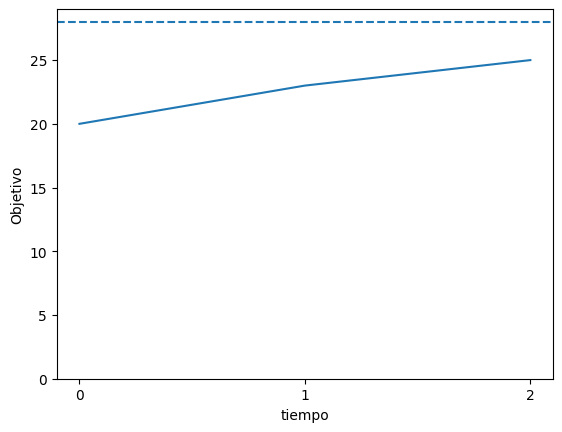

In [18]:
vals = []
hill_climbing(q8, lambda board, val: vals.append(val))
objective_plot(vals)

### Probabilidad de optimalidad

In [19]:
def optimal_stats(n):
    q = NQueens(n)
    optimal_val = n * (n - 1) / 2
    N = 200
    total = sum(optimal_val == q.objective_value(hill_climbing(q))
                for _ in range(N))
    return total / N

In [20]:
optimal_stats(8)

0.11

In [21]:
optimal_stats(1)

1.0

In [22]:
optimal_stats(2)

0.0

In [23]:
optimal_stats(3)

0.0

In [24]:
optimal_stats(4)

0.42

In [25]:
optimal_stats(5)

0.73

In [26]:
sizes = list(range(4, 11))
dist = [optimal_stats(n) for n in sizes]

In [27]:
sizes

[4, 5, 6, 7, 8, 9, 10]

In [28]:
dist

[0.41, 0.69, 0.1, 0.26, 0.15, 0.17, 0.03]

In [29]:
def optimality_plot(sizes, dist):
    fig = plt.figure(figsize=(10,5))
    ax = plt.axes()
    ax.set_ylim([0.0, 1.0])
    ax.set_xticks(sizes)
    ax.bar(sizes, dist)

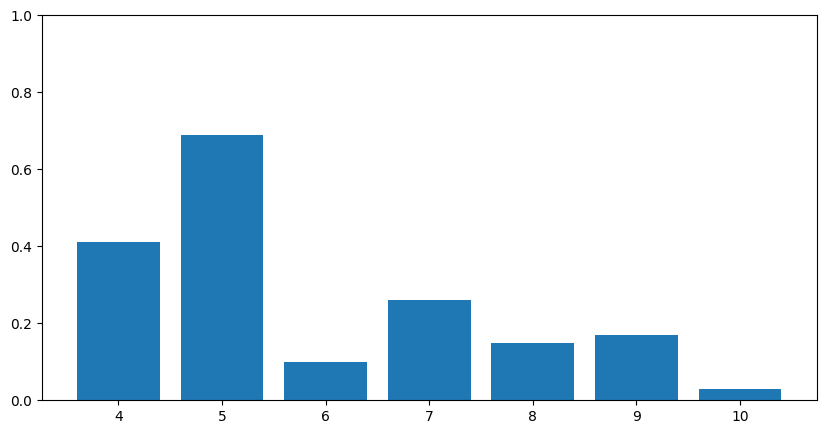

In [30]:
optimality_plot(sizes, dist)

### Cantidad de iteraciones promedio

In [31]:
def iteration_stats(n):
    q = NQueens(n)
    N = 200
    total = 0
    def inc_total(*args):
        nonlocal total
        total += 1
    for _ in range(N):
        hill_climbing(q, inc_total)
    return total / N

In [32]:
iteration_stats(8)

4.19

In [33]:
sizes = list(range(4, 11))
iters = [iteration_stats(n) for n in sizes]

In [34]:
iters

[2.505, 3.19, 3.315, 3.84, 4.18, 4.55, 5.075]

In [35]:
def iterations_plot(sizes, iters):
    fig = plt.figure(figsize=(10,5))
    ax = plt.axes()
    ax.set_xticks(sizes)
    ax.bar(sizes, iters)
    ax.set_ylim(bottom=0)

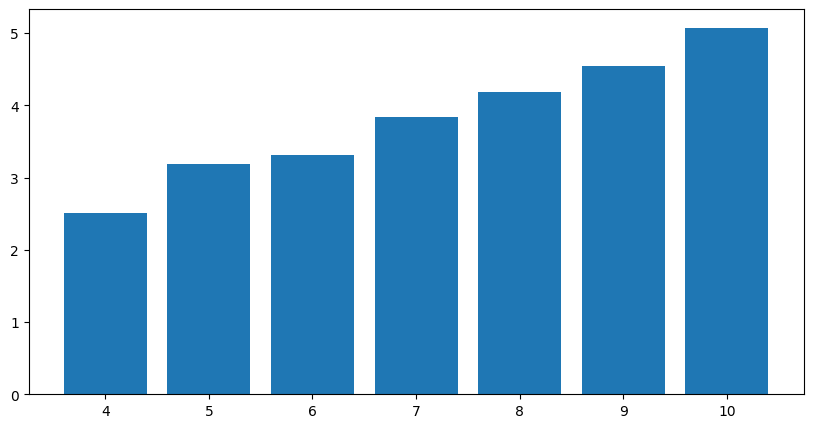

In [36]:
iterations_plot(sizes, iters)

### Variante: Explorando al atorarse

```python
def hill_climbing(problem, log = lambda *_: None):
    value = problem.objective_value
    current = problem.random_state()
    current_val = value(current)
    log(current, current_val)
    while True:
        neighbor = hill_successor(problem, current)
        if not neighbor:
            break
        neighbor_val = value(neighbor)
        if neighbor_val <= current_val:
            break
        current = neighbor
        current_val = neighbor_val
        log(current, current_val)
    return current
```

In [37]:
def hill_climbing_sideways(problem, m=100, eps=0.001, log = lambda *_: None):
    value = problem.objective_value
    current = problem.random_state()
    current_val = value(current)
    log(current, current_val)
    while True:
        neighbor = hill_successor(problem, current)
        if not neighbor:
            break
        neighbor_val = value(neighbor)
        if neighbor_val <= current_val:
            # inicio de cambios /*********************************
            if m == 0 or abs(neighbor_val - current_val) > eps:
                break
            m -= 1
            # ************************************/ fin de cambios
        current = neighbor
        current_val = neighbor_val
        log(current, current_val)
    return current

In [38]:
q8.objective_value(hill_climbing_sideways(q8))

28.0

In [39]:
def optimal_stats(n):
    q = NQueens(n)
    optimal_val = n * (n - 1) / 2
    N = 200
    total = sum(optimal_val == q.objective_value(hill_climbing_sideways(q))
                for _ in range(N))
    return total / N

In [40]:
optimal_stats(8)

0.975

In [41]:
sizes = list(range(4, 11))
dist = [optimal_stats(n) for n in sizes]

In [42]:
dist

[1.0, 1.0, 0.82, 0.93, 0.935, 0.975, 0.915]

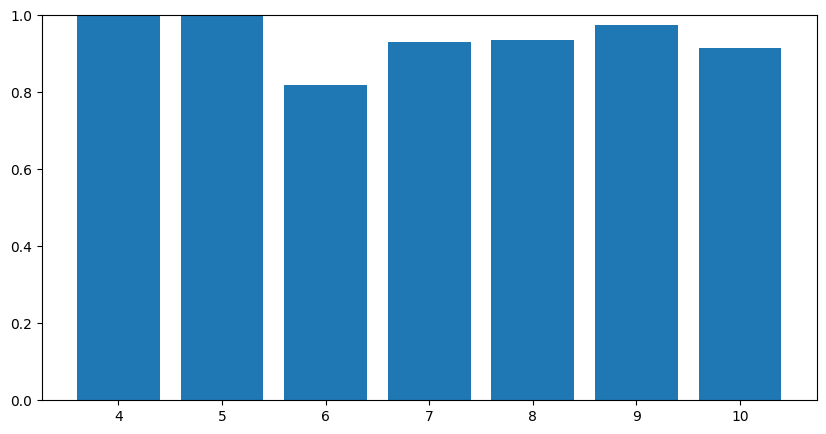

In [43]:
optimality_plot(sizes, dist)

In [44]:
def iteration_stats(n):
    q = NQueens(n)
    N = 200
    total = 0
    def inc_total(*args):
        nonlocal total
        total += 1
    for _ in range(N):
        hill_climbing_sideways(q, log = inc_total)
    return total / N

In [45]:
iteration_stats(8)

25.165

In [46]:
sizes = list(range(4, 11))
iters = [iteration_stats(n) for n in sizes]

In [47]:
iters

[3.665, 3.965, 45.74, 15.725, 22.455, 27.425, 38.985]

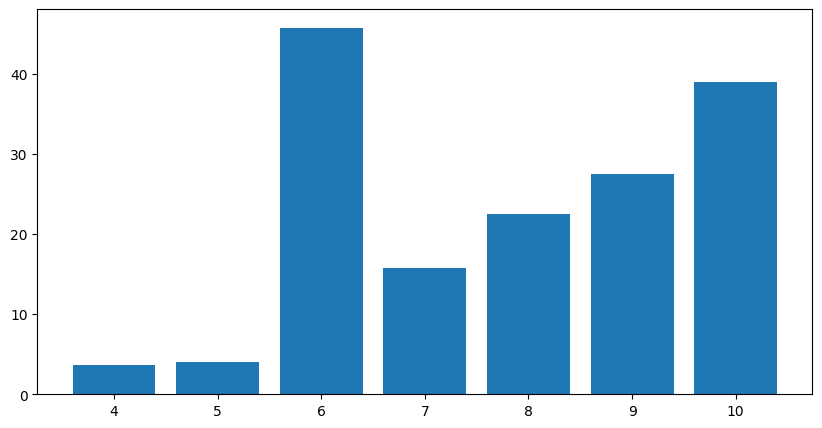

In [48]:
iterations_plot(sizes, iters)

### Variante: Ascenso estocástico

```python
def hill_climbing(problem, log = lambda *_: None):
    value = problem.objective_value
    current = problem.random_state()
    current_val = value(current)
    log(current, current_val)
    while True:
        neighbor = hill_successor(problem, current)
        if not neighbor:
            break
        neighbor_val = value(neighbor)
        if neighbor_val <= current_val:
            break
        current = neighbor
        current_val = neighbor_val
        log(current, current_val)
    return current
```

In [49]:
def hill_climbing_stochastic(problem, log = lambda *_: None):
    value = problem.objective_value
    current = problem.random_state()
    current_val = value(current)
    log(current, current_val)
    while True:
        # inicio de cambios /*********************************
        neighbor = hill_stochastic_successor(problem, current)
        # ************************************/ fin de cambios
        if not neighbor:
            break
        neighbor_val = value(neighbor)
        if neighbor_val <= current_val:
            break
        current = neighbor
        current_val = neighbor_val
        log(current, current_val)
    return current

```python
def hill_successor(problem, board):
    neighbors = list(problem.neighborhood(board))
    if not neighbors:
        return None
    shuffle(neighbors)
    return max(neighbors, key=problem.objective_value)
```

In [50]:
def hill_stochastic_successor(problem, board):
    value = problem.objective_value(board)
    neighbors = []
    for neighbor in problem.neighborhood(board):
        if problem.objective_value(neighbor) > value:
            neighbors.append(neighbor)
    if not neighbors:
        return None
    return choice(neighbors)

In [51]:
def optimal_stats(n):
    q = NQueens(n)
    optimal_val = n * (n - 1) / 2
    N = 200
    total = sum(
        optimal_val == q.objective_value(
            hill_climbing_stochastic(q)
        )
        for _ in range(N)
    )
    return total / N

def iteration_stats(n):
    q = NQueens(n)
    N = 200
    total = 0
    def inc_total(*args):
        nonlocal total
        total += 1
    for _ in range(N):
        hill_climbing_stochastic(q, log = inc_total)
    return total / N

In [52]:
sizes = list(range(4, 11))

dist = [optimal_stats(n) for n in sizes]
iters = [iteration_stats(n) for n in sizes]

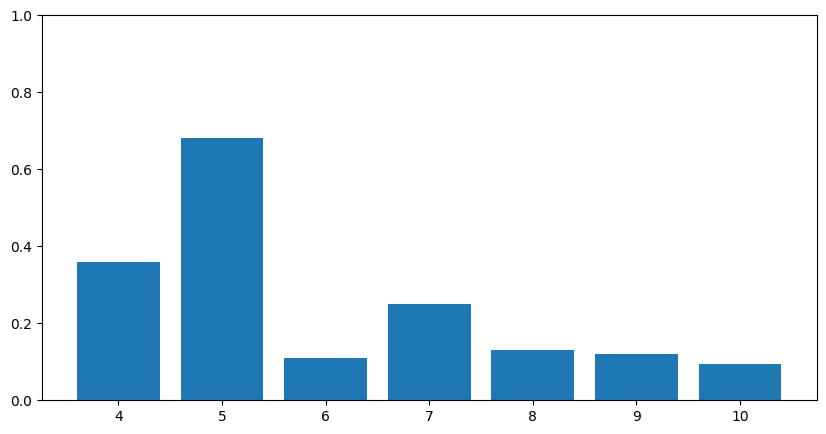

In [53]:
optimality_plot(sizes, dist)

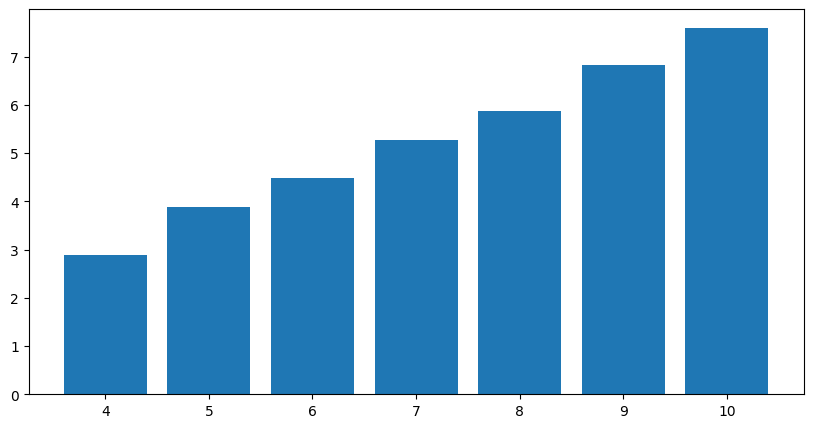

In [54]:
iterations_plot(sizes, iters)

### Variante: Reinicios aleatorios

In [55]:
def hill_climbing_restart(problem, r = 10, log = lambda *_: None):
    return max((hill_climbing(problem, log=log)
                for _ in range(r)),
               key=problem.objective_value)

In [56]:
def optimal_stats(n):
    q = NQueens(n)
    optimal_val = n * (n - 1) / 2
    N = 200
    total = sum(
        optimal_val == q.objective_value(hill_climbing_restart(q))
        for _ in range(N)
    )
    return total / N

def iteration_stats(n):
    q = NQueens(n)
    N = 200
    total = 0
    def inc_total(*args):
        nonlocal total
        total += 1
    for _ in range(N):
        hill_climbing_restart(q, log = inc_total)
    return total / N

In [57]:
sizes = list(range(4, 11))

dist = [optimal_stats(n) for n in sizes]
iters = [iteration_stats(n) for n in sizes]

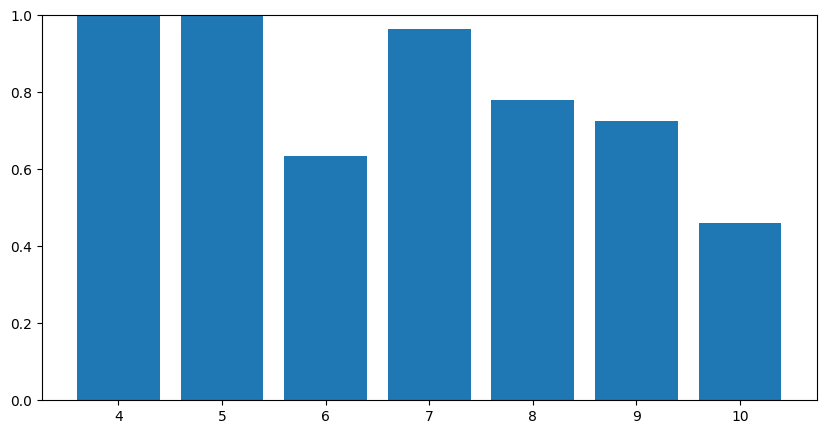

In [58]:
optimality_plot(sizes, dist)

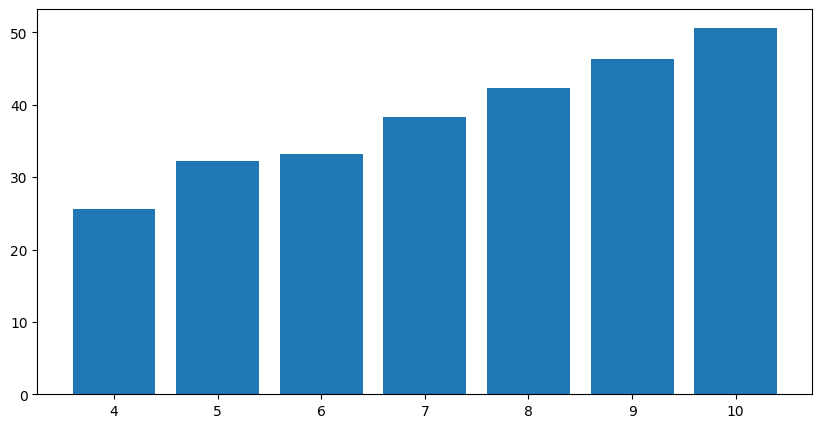

In [59]:
iterations_plot(sizes, iters)

## Recocido/Temple simulado (*Simulated annealing*)

![GIF forjar](https://media.giphy.com/media/NpILbqtmLO1Qkfvc4f/giphy.gif)

In [60]:
def linear_cooling(T0 = 20, tmax = 100):
    tmax = max(tmax, 1)
    T0 = max(T0, 0)
    m = -T0/tmax
    return lambda t: max(m * t + T0, 0)

In [61]:
def cooling_plot(func, tmax = 100):
    fig = plt.figure()
    ax = plt.axes()
    ts = list(range(tmax + 1))
    Ts = [func(t) for t in ts]
    ax.set_xlabel("time")
    ax.set_ylabel("Temperature")
    ax.set_xlim([0, tmax])
    ax.plot(ts, Ts)
    ax.set_ylim(bottom=0)

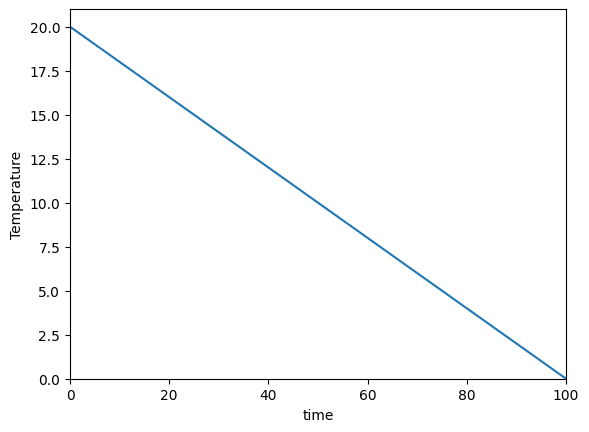

In [62]:
cooling_plot(linear_cooling())

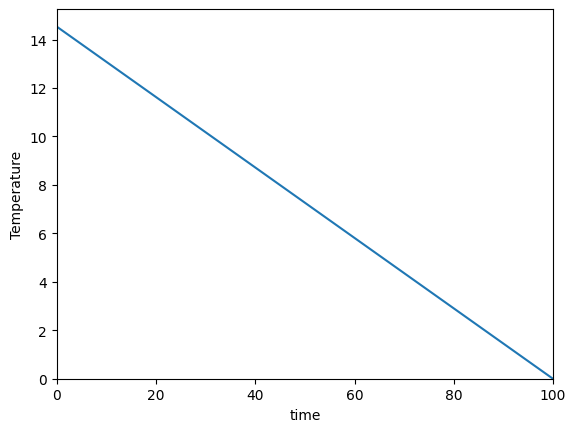

In [63]:
cooling_plot(linear_cooling(14.53))

In [64]:
def simulated_annealing(problem, cooling, log = lambda *_: None):
    value = problem.objective_value
    current = problem.random_state()
    current_val = value(current)
    log(current, current_val, float("inf"), None)
    for t in count():
        T = cooling(t)
        if T == 0:
            break
        neighbor = problem.random_neighbor(current)
        if not neighbor:
            break
        neighbor_val = value(neighbor)
        delta_val = neighbor_val - current_val
        prob = 1.0 if delta_val > 0 else np.exp(delta_val / T)
        if random() < prob:
            current = neighbor
            current_val = neighbor_val
        log(current, current_val, T, prob)
    return current

### Resolviendo el problema (probablemente)

In [65]:
board = simulated_annealing(q8, linear_cooling())
show(board)
q8.objective_value(board)

┏━━━┳━━━┳━━━┳━━━┳━━━┳━━━┳━━━┳━━━┓
┃   ┃ ♛ ┃   ┃   ┃ ♛ ┃   ┃   ┃   ┃
┣━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━┫
┃   ┃   ┃ ♛ ┃   ┃   ┃   ┃   ┃   ┃
┣━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━┫
┃ ♛ ┃   ┃   ┃   ┃   ┃ ♛ ┃   ┃ ♛ ┃
┣━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━┫
┃   ┃   ┃   ┃   ┃   ┃   ┃   ┃   ┃
┣━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━┫
┃   ┃   ┃   ┃   ┃   ┃   ┃   ┃   ┃
┣━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━┫
┃   ┃   ┃   ┃   ┃   ┃   ┃   ┃   ┃
┣━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━┫
┃   ┃   ┃   ┃   ┃   ┃   ┃ ♛ ┃   ┃
┣━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━┫
┃   ┃   ┃   ┃ ♛ ┃   ┃   ┃   ┃   ┃
┗━━━┻━━━┻━━━┻━━━┻━━━┻━━━┻━━━┻━━━┛



23.0

In [66]:
simulated_annealing(
    q8,
    linear_cooling(),
    log = print,
)

(6, 7, 0, 6, 1, 1, 7, 5) 22.0 inf None
(1, 7, 0, 6, 1, 1, 7, 5) 22.0 20.0 1.0
(1, 7, 0, 6, 1, 5, 7, 5) 23.0 19.8 1.0
(1, 7, 0, 1, 1, 5, 7, 5) 19.0 19.6 0.8153958055474629
(1, 6, 0, 1, 1, 5, 7, 5) 20.0 19.4 1.0
(1, 6, 0, 1, 3, 5, 7, 5) 21.0 19.2 1.0
(0, 6, 0, 1, 3, 5, 7, 5) 21.0 19.0 1.0
(0, 5, 0, 1, 3, 5, 7, 5) 20.0 18.8 0.9481984251856296
(0, 5, 0, 1, 3, 3, 7, 5) 19.0 18.6 0.9476562567372652
(0, 5, 0, 1, 4, 3, 7, 5) 18.0 18.4 0.9471026222044756
(0, 4, 0, 1, 4, 3, 7, 5) 18.0 18.2 1.0
(0, 4, 0, 1, 4, 7, 7, 5) 20.0 18.0 1.0
(0, 6, 0, 1, 4, 7, 7, 5) 21.0 17.8 1.0
(0, 6, 0, 0, 4, 7, 7, 5) 21.0 17.6 1.0
(0, 6, 5, 0, 4, 7, 7, 5) 22.0 17.4 1.0
(0, 6, 5, 0, 4, 4, 7, 5) 23.0 17.2 1.0
(0, 6, 5, 0, 4, 4, 7, 6) 21.0 17.0 0.8890097654027757
(0, 6, 5, 0, 3, 4, 7, 6) 19.0 16.8 0.8877655252065778
(6, 6, 5, 0, 3, 4, 7, 6) 18.0 16.6 0.9415376297102509
(6, 6, 5, 0, 0, 4, 7, 6) 21.0 16.4 1.0
(6, 6, 5, 5, 0, 4, 7, 6) 21.0 16.2 1.0
(6, 6, 5, 6, 0, 4, 7, 6) 17.0 16.0 0.7788007830714049
(6, 6, 5, 6, 0, 4, 7, 

(4, 4, 7, 5, 5, 1, 6, 6)

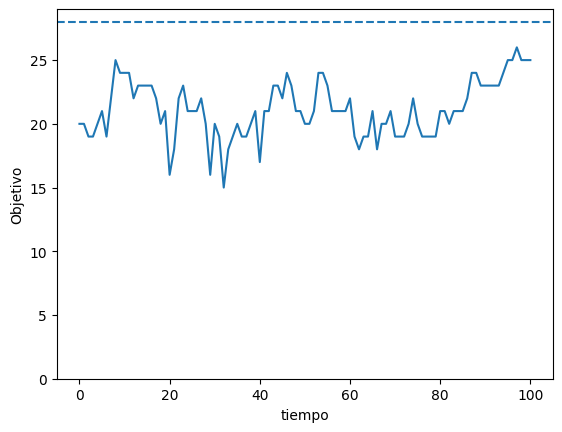

In [67]:
vals = []
simulated_annealing(
    q8,
    linear_cooling(),
    lambda board, val, T, prob: vals.append(val)
)
objective_plot(vals)

In [68]:
def prob_plot(probs):
    fig = plt.figure()
    ax = plt.axes()
    
    iters = list(range(len(probs)))
    
    ax.set_ylim([0, 1.1])
    ax.set_xlabel("tiempo")
    ax.set_ylabel("Probabilidad")
    ax.axhline(y=1.0, linestyle="--", color="r")
    if len(iters) <= 20:
        ax.set_xticks(iters)
    ax.plot(iters, probs, "-", linewidth=0.75)

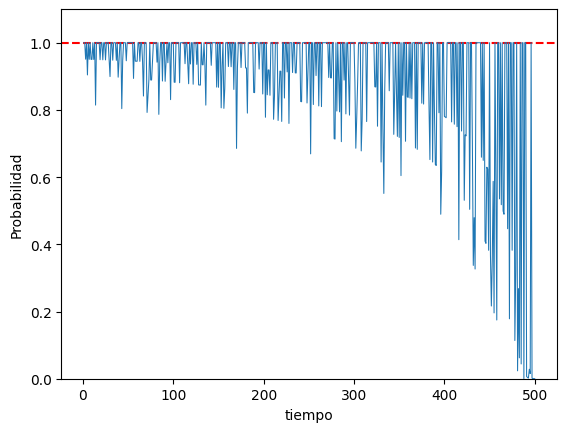

In [69]:
probs = []
simulated_annealing(
    q8,
    linear_cooling(tmax=500),
    lambda board, val, T, prob: probs.append(prob)
)
prob_plot(probs)

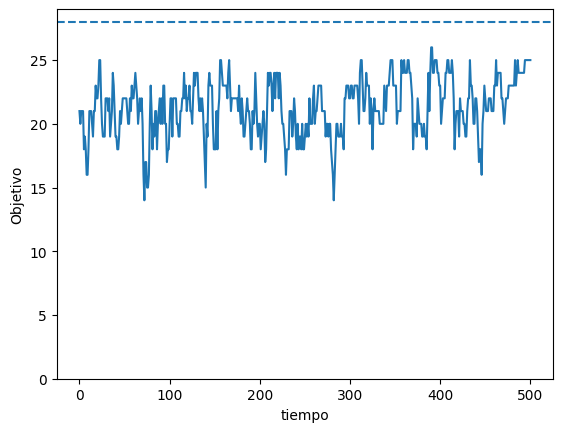

In [70]:
vals = []
simulated_annealing(
    q8,
    linear_cooling(tmax=500),
    lambda board, val, T, prob: vals.append(val)
)
objective_plot(vals)

### Variante: Enfriamiento exponencial

In [71]:
def expt_cooling(T0 = 20, speedup = 0.005, tmax = 100):
    tmax = max(tmax, 1)
    T0 = max(T0, 0)
    speedup = abs(speedup)
    return lambda t: (
        T0 * np.exp(-speedup * t)
        if t < tmax
        else 0
    )

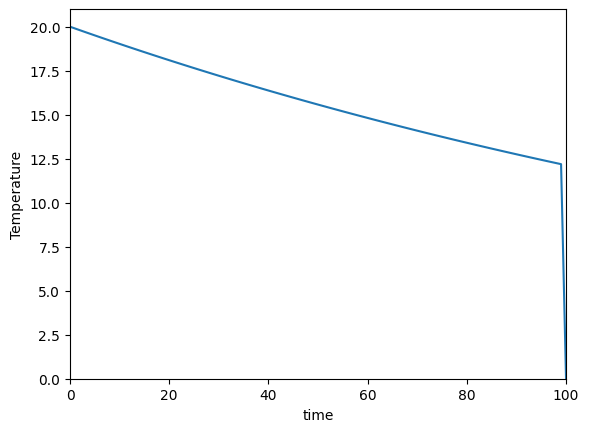

In [72]:
cooling_plot(expt_cooling())

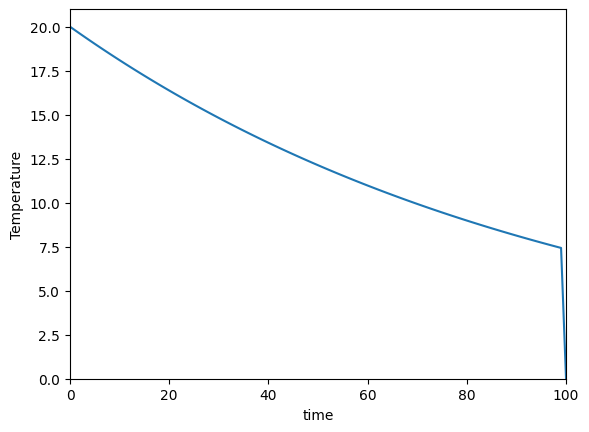

In [73]:
cooling_plot(expt_cooling(speedup=0.01))

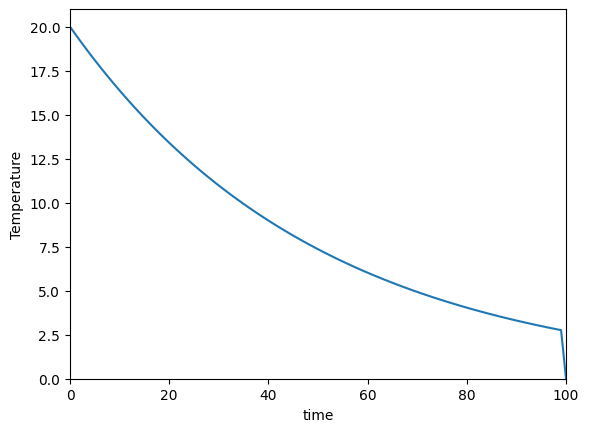

In [74]:
cooling_plot(expt_cooling(speedup=0.02))

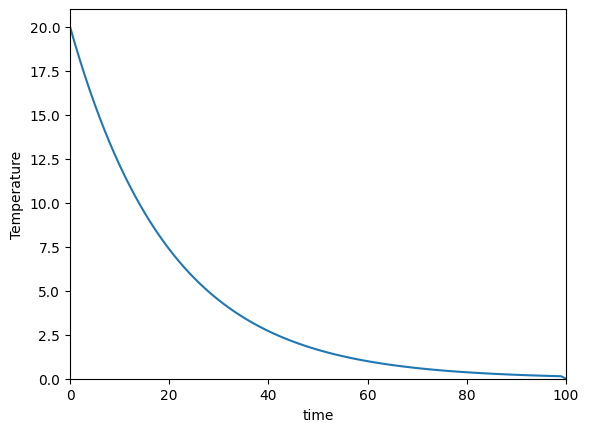

In [75]:
cooling_plot(expt_cooling(speedup=0.05))

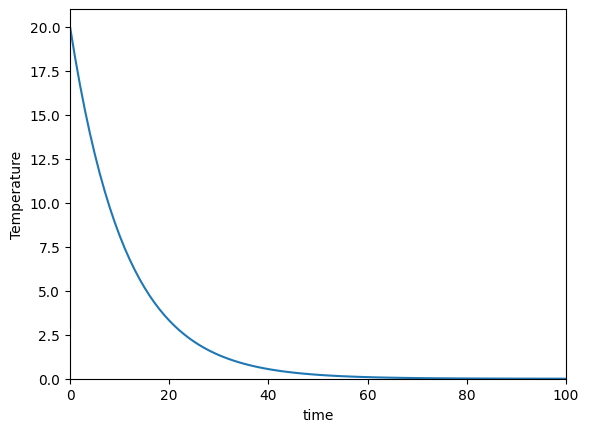

In [76]:
cooling_plot(expt_cooling(speedup=0.09))

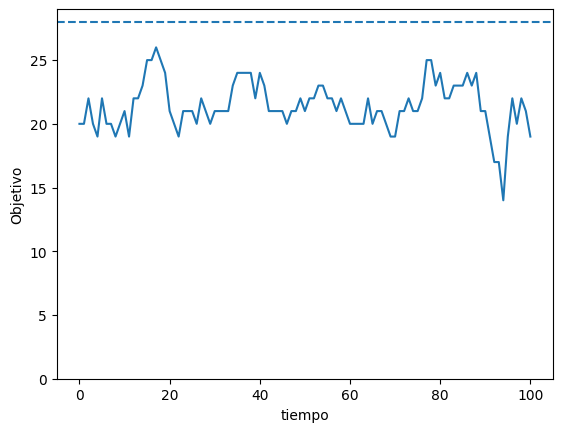

In [77]:
vals = []
simulated_annealing(
    q8,
    expt_cooling(),
    lambda board, val, T, prob: vals.append(val),
)
objective_plot(vals)

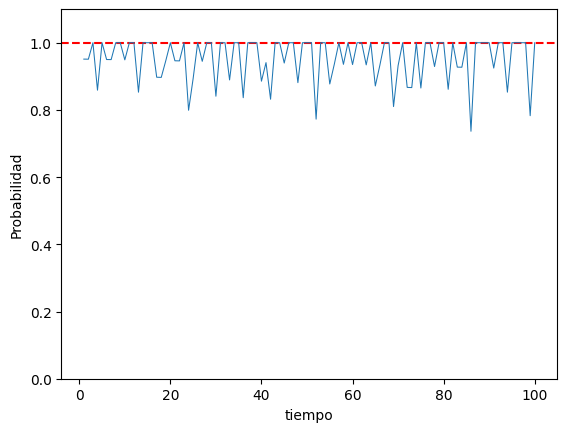

In [78]:
probs = []
simulated_annealing(
    q8,
    expt_cooling(),
    lambda board, val, T, prob: probs.append(prob)
)
prob_plot(probs)

## Algoritmos evolutivos (*Evolutionary algorithms*)
![GIF darwin](https://media.giphy.com/media/VFAke5Xm1TDwjgimyW/giphy.gif)
![GIF random](https://media.giphy.com/media/89Eko49m84Ja/giphy.gif)

In [79]:
def mutate(problem, board):
    return problem.random_neighbor(board)

In [80]:
def reproduce(board1, board2):
    i = randint(0, len(board1) - 1)
    return board1[:i] + board2[i:]

In [81]:
def genetic_algorithm(problem, pop = 20,
                      mut = 0.2, top = 0.2,
                      epochs = 100,
                      log = lambda *_: None):
    population = [problem.random_state() for _ in range(pop)]
    top_bound = int(pop * top)
    for epoch in range(epochs):
        population.sort(key=problem.objective_value, reverse=True)
        log(population[0], problem.objective_value(population[0]))
        best = population[:top_bound]
        while len(best) < pop:
            if top_bound > 0 and random() < mut:
                peep = best[randint(0, top_bound - 1)]
                best.append(mutate(problem, peep))
                continue
            peep1 = best[randint(0, top_bound - 1)]
            peep2 = best[randint(0, top_bound - 1)]
            best.append(reproduce(peep1, peep2))
        population = best
    population.sort(key=problem.objective_value, reverse=True)
    log(population[0], problem.objective_value(population[0]))
    return population[0]

In [82]:
board = genetic_algorithm(q8)
show(board)
q8.objective_value(board)

┏━━━┳━━━┳━━━┳━━━┳━━━┳━━━┳━━━┳━━━┓
┃   ┃ ♛ ┃   ┃   ┃   ┃   ┃   ┃   ┃
┣━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━┫
┃   ┃   ┃   ┃ ♛ ┃   ┃   ┃   ┃   ┃
┣━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━┫
┃   ┃   ┃   ┃   ┃   ┃   ┃ ♛ ┃   ┃
┣━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━┫
┃   ┃   ┃   ┃   ┃ ♛ ┃   ┃   ┃   ┃
┣━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━┫
┃   ┃   ┃ ♛ ┃   ┃   ┃   ┃   ┃   ┃
┣━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━┫
┃ ♛ ┃   ┃   ┃   ┃   ┃   ┃   ┃   ┃
┣━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━┫
┃   ┃   ┃   ┃   ┃   ┃ ♛ ┃   ┃   ┃
┣━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━╋━━━┫
┃   ┃   ┃   ┃   ┃   ┃   ┃   ┃ ♛ ┃
┗━━━┻━━━┻━━━┻━━━┻━━━┻━━━┻━━━┻━━━┛



27.0

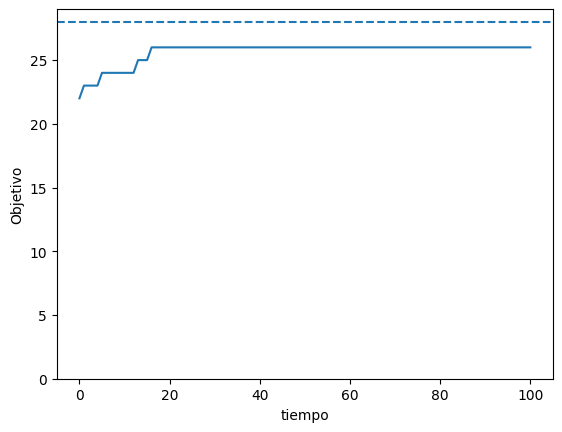

In [83]:
vals = []
genetic_algorithm(
    q8,
    log=lambda board, val: vals.append(val)
)
objective_plot(vals)